In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Step-1: Loading the Dataset

In [6]:
try:
    df = pd.read_csv('../datasets/Indian_Kids_Screen_Time.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: '../datasets/Indian_Kids_Screen_Time.csv' not found. Please ensure the file is in the correct directory.")
    exit()

print("\nDataset Head:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nDataset Description:")
print(df.describe(include='all'))

Dataset loaded successfully.

Dataset Head:
   Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3                   

In [5]:
target_column = 'Exceeded_Recommended_Limit'
X = df.drop(columns=[target_column, 'Health_Impacts'])
y = df[target_column]

print(f"\nTarget variable chosen: '{target_column}'")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution:\n{y.value_counts()}")


Target variable chosen: 'Exceeded_Recommended_Limit'
Features shape: (9712, 6)
Target shape: (9712,)
Target distribution:
Exceeded_Recommended_Limit
True     8301
False    1411
Name: count, dtype: int64


Step-3 Data Preprocessing

In [7]:
print("\nChecking for missing values:")
print(X.isnull().sum())

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nNumerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

numerical_transformer_knn = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor_knn = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_knn, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

preprocessor_nb = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough'
)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
encoded_class_names = [str(cls) for cls in label_encoder.classes_]


print("\nSplitting data into training and testing sets (80/20 split)...")
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Checking for missing values:
Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Educational_to_Recreational_Ratio    0
Urban_or_Rural                       0
dtype: int64

Numerical features: ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']
Categorical features: ['Gender', 'Primary_Device', 'Urban_or_Rural']

Splitting data into training and testing sets (80/20 split)...
Training set shape: (7769, 6), (7769,)
Testing set shape: (1943, 6), (1943,)


Step-4: Implement K-Nearest Neighbors (KNN)

In [8]:
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor_knn),
                               ('classifier', KNeighborsClassifier(n_neighbors=5))])

knn_pipeline.fit(X_train, y_train)

y_pred_knn = knn_pipeline.predict(X_test)

print("\nKNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn, target_names=encoded_class_names))

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn, target_names=encoded_class_names, output_dict=True)


KNN Accuracy: 0.9644879053010808

KNN Confusion Matrix:
 [[ 224   58]
 [  11 1650]]

KNN Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.79      0.87       282
        True       0.97      0.99      0.98      1661

    accuracy                           0.96      1943
   macro avg       0.96      0.89      0.92      1943
weighted avg       0.96      0.96      0.96      1943



Step-5: Implement Naive Bayes (GaussianNB)

In [9]:
nb_pipeline = Pipeline(steps=[('preprocessor', preprocessor_nb),
                              ('classifier', GaussianNB())])

nb_pipeline.fit(X_train, y_train)

y_pred_nb = nb_pipeline.predict(X_test)

print("\nNaive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nNaive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nNaive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb, target_names=encoded_class_names))

nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_report = classification_report(y_test, y_pred_nb, target_names=encoded_class_names, output_dict=True)


Naive Bayes Accuracy: 0.9140504374678332

Naive Bayes Confusion Matrix:
 [[ 172  110]
 [  57 1604]]

Naive Bayes Classification Report:
               precision    recall  f1-score   support

       False       0.75      0.61      0.67       282
        True       0.94      0.97      0.95      1661

    accuracy                           0.91      1943
   macro avg       0.84      0.79      0.81      1943
weighted avg       0.91      0.91      0.91      1943



Step-6: Compare the Metrics in a Table

                             KNN  Naive Bayes
Metric                                       
Accuracy                  0.9645       0.9141
Precision (False)         0.9532       0.7511
Recall (False)            0.7943       0.6099
F1-Score (False)          0.8665       0.6732
Precision (True)          0.9660       0.9358
Recall (True)             0.9934       0.9657
F1-Score (True)           0.9795       0.9505
Precision (macro Avg)     0.9596       0.8435
Recall (macro Avg)        0.8939       0.7878
F1-Score (macro Avg       0.9230       0.8119
Precision (weighted Avg)  0.9642       0.9090
Recall (weighted Avg)     0.9645       0.9141
F1-Score (weighted Avg    0.9631       0.9103


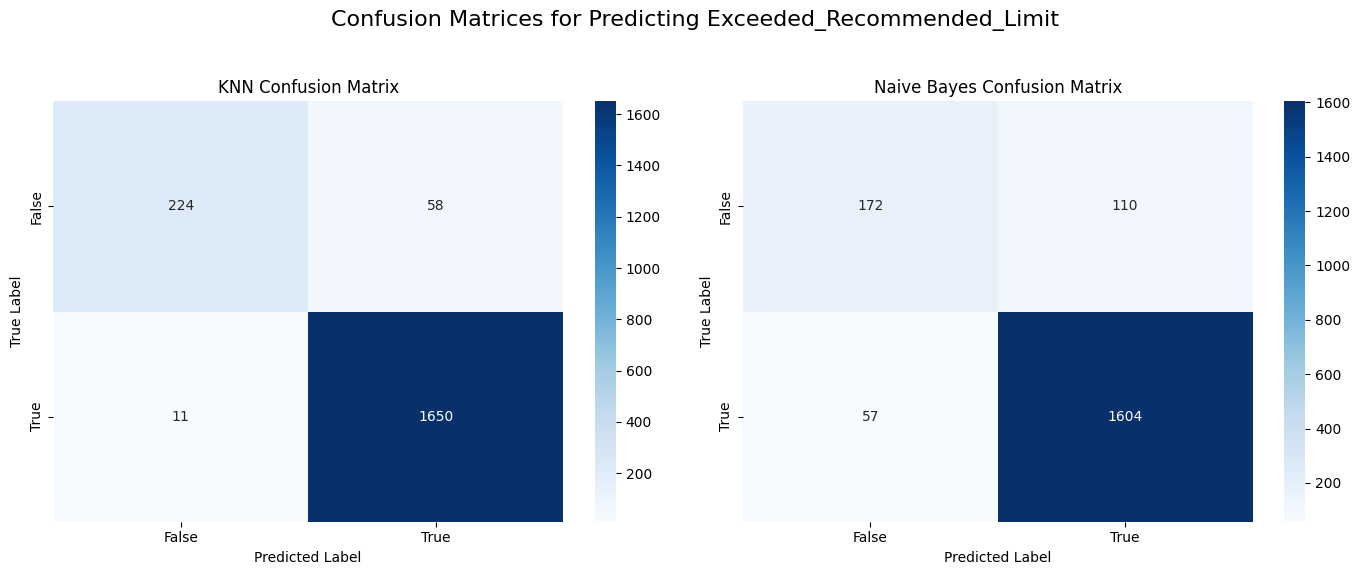

In [10]:
comparison_data = {
    'Metric': ['Accuracy'],
    'KNN': [knn_accuracy],
    'Naive Bayes': [nb_accuracy]
}

for target_name_str in encoded_class_names:
    comparison_data['Metric'].extend([
        f'Precision ({target_name_str})',
        f'Recall ({target_name_str})',
        f'F1-Score ({target_name_str})'
    ])
    comparison_data['KNN'].extend([
        knn_report[target_name_str]['precision'],
        knn_report[target_name_str]['recall'],
        knn_report[target_name_str]['f1-score']
    ])
    comparison_data['Naive Bayes'].extend([
        nb_report[target_name_str]['precision'],
        nb_report[target_name_str]['recall'],
        nb_report[target_name_str]['f1-score']
    ])

for avg_type in ['macro avg', 'weighted avg']:
    comparison_data['Metric'].extend([
        f'Precision ({avg_type.replace("avg", "Avg")})',
        f'Recall ({avg_type.replace("avg", "Avg")})',
        f'F1-Score ({avg_type.replace("avg", "Avg")}'
    ])
    comparison_data['KNN'].extend([
        knn_report[avg_type]['precision'],
        knn_report[avg_type]['recall'],
        knn_report[avg_type]['f1-score']
    ])
    comparison_data['Naive Bayes'].extend([
        nb_report[avg_type]['precision'],
        nb_report[avg_type]['recall'],
        nb_report[avg_type]['f1-score']
    ])

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.set_index('Metric')

print(comparison_df.round(4))

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # Create a figure with two subplots
fig.suptitle(f'Confusion Matrices for Predicting {target_column}', fontsize=16)

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=encoded_class_names, yticklabels=encoded_class_names)
axes[0].set_title('KNN Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=encoded_class_names, yticklabels=encoded_class_names)
axes[1].set_title('Naive Bayes Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()